In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
team_stats = pd.read_csv('team_stats.csv')

In [3]:
team_stats.head()

,region,slug,name,acronym,team_id,nwin,nloss
0,NORTH AMERICA,gentle-hearts-gaming,Gentle Hearts Gaming,GHG,110733877357854829,4,3
1,EMEA,forsaken,Maturalni Forsaken,MFSK,107416342401528388,56,58
2,EMEA,galakticos,GALAKTICOS,GAL,99566406066182955,106,139
3,EMEA,atleta-esport,Atleta Esport,ATE,107456994699991548,62,45
4,LATIN AMERICA SOUTH,undead-bk,Undead BK,UBK,104843437139220481,12,24


### data has columns

- **region:** The region where the team belongs.

- **slug:** A unique identifier for the team.
- **name:** The full name of the team.
- **acronym:** An acronym representing the team.
- **team_id:** A unique identifier for the team (numeric).
- **nwin:** The number of wins.
- **nloss:** The number of losses.

### the basic metric is winning percentage

$$
\text{Winning \%} = \frac{\text{n wins}}{\text{n wins} + \text{n loss}}
$$

In [4]:
# Add winp column to the dataframe

team_stats["ntot"] = team_stats["nwin"] + team_stats["nloss"]

team_stats["winp"] = team_stats["nwin"] / team_stats["ntot"]

team_stats.head()

,region,slug,name,acronym,team_id,nwin,nloss,ntot,winp
0,NORTH AMERICA,gentle-hearts-gaming,Gentle Hearts Gaming,GHG,110733877357854829,4,3,7,0.571429
1,EMEA,forsaken,Maturalni Forsaken,MFSK,107416342401528388,56,58,114,0.491228
2,EMEA,galakticos,GALAKTICOS,GAL,99566406066182955,106,139,245,0.432653
3,EMEA,atleta-esport,Atleta Esport,ATE,107456994699991548,62,45,107,0.579439
4,LATIN AMERICA SOUTH,undead-bk,Undead BK,UBK,104843437139220481,12,24,36,0.333333


In [5]:
# team_stats = team_stats[team_stats['region'] != 'EMEA']

# team_stats

# Methodology

**Prior to comparing the regional win percentages of the team**, we will look at the teams that have internationl region instances and compare their win percentages. We will aggregate the international win percentages based on the regions of the teams. This will allow us to **estimate the international strength of the region**.

In [6]:
# # Filter international instances

international_teams = team_stats[team_stats["region"] == "INTERNATIONAL"]

international_teams.head()

,region,slug,name,acronym,team_id,nwin,nloss,ntot,winp
23,INTERNATIONAL,psg-talon,PSG Talon,PSG,104367068120825486,48,47,95,0.505263
24,INTERNATIONAL,cloud9,Cloud9,C9,98767991877340524,31,45,76,0.407895
63,INTERNATIONAL,hanwha-life-esports,Hanwha Life Esports,HLE,100205573496804586,15,9,24,0.625000
64,INTERNATIONAL,fnatic,Fnatic,FNC,98767991866488695,22,25,47,0.468085
71,INTERNATIONAL,bilibili-gaming,Bilibili Gaming Pingan Bank,BLG,99566404853854212,14,6,20,0.700000


In [7]:
# Find the true region for the international instances

domestic_counterparts = team_stats[team_stats["slug"].isin(international_teams["slug"]) & 
                                  (team_stats["region"] != "INTERNATIONAL")]


agg_international_stats = international_teams.merge(domestic_counterparts[["slug", "region"]],
                                                   on="slug", 
                                                   suffixes=("_intl", "_domestic"))

agg_international_stats.head()

,region_intl,slug,name,acronym,team_id,nwin,nloss,ntot,winp,region_domestic
0,INTERNATIONAL,psg-talon,PSG Talon,PSG,104367068120825486,48,47,95,0.505263,"HONG KONG, MACAU, TAIWAN"
1,INTERNATIONAL,cloud9,Cloud9,C9,98767991877340524,31,45,76,0.407895,NORTH AMERICA
2,INTERNATIONAL,hanwha-life-esports,Hanwha Life Esports,HLE,100205573496804586,15,9,24,0.625000,KOREA
3,INTERNATIONAL,fnatic,Fnatic,FNC,98767991866488695,22,25,47,0.468085,EMEA
4,INTERNATIONAL,bilibili-gaming,Bilibili Gaming Pingan Bank,BLG,99566404853854212,14,6,20,0.700000,CHINA


In [8]:
# Aggregate the international win percentages based on region

regional_international_winp = agg_international_stats.groupby("region_domestic")["winp"].mean().reset_index()

regional_international_winp.columns = ["region", "international_winp"]

print(len(regional_international_winp),'regions have competed internationally.')


11 regions have competed internationally.


In [9]:
# # populate latin america north and south with the LATIN AMERICA value
LatinAmericaRegionalRating = float(regional_international_winp[regional_international_winp["region"] == "LATIN AMERICA"]['international_winp'])

new_entries = [{"region": "LATIN AMERICA NORTH", "international_winp": LatinAmericaRegionalRating},
               {"region": "LATIN AMERICA SOUTH", "international_winp": LatinAmericaRegionalRating}]

regional_international_winp = pd.concat([regional_international_winp, pd.DataFrame(new_entries)], ignore_index=True)

regional_international_winp

/var/folders/b6/zjrzfvq14h12kvt3_h7c4fwr0000gn/T/ipykernel_18076/2548763425.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  LatinAmericaRegionalRating = float(regional_international_winp[regional_international_winp["region"] == "LATIN AMERICA"]['international_winp'])


,region,international_winp
0,BRAZIL,0.310025
1,CHINA,0.621957
2,COMMONWEALTH OF INDEPENDENT STATES,0.288889
3,EMEA,0.419435
4,"HONG KONG, MACAU, TAIWAN",0.253434
5,JAPAN,0.289655
6,KOREA,0.702543
7,LATIN AMERICA,0.222917
8,NORTH AMERICA,0.406237
9,OCEANIA,0.177632


In [10]:
team_stats_with_regional_strength = team_stats.merge(regional_international_winp)

# get a median strength for the regions that don't have international instances
median_strength = regional_international_winp["international_winp"]

print(median_strength.median())

0.28888888888888886


In [11]:
team_stats_with_regional_strength = team_stats.merge(regional_international_winp, on="region", how="left")

# for regions without international experience, fill with the median strength
team_stats_with_regional_strength["international_winp"].fillna(median_strength, inplace=True)

team_stats_with_regional_strength.head()

,region,slug,name,acronym,team_id,nwin,nloss,ntot,winp,international_winp
0,NORTH AMERICA,gentle-hearts-gaming,Gentle Hearts Gaming,GHG,110733877357854829,4,3,7,0.571429,0.406237
1,EMEA,forsaken,Maturalni Forsaken,MFSK,107416342401528388,56,58,114,0.491228,0.419435
2,EMEA,galakticos,GALAKTICOS,GAL,99566406066182955,106,139,245,0.432653,0.419435
3,EMEA,atleta-esport,Atleta Esport,ATE,107456994699991548,62,45,107,0.579439,0.419435
4,LATIN AMERICA SOUTH,undead-bk,Undead BK,UBK,104843437139220481,12,24,36,0.333333,0.222917


In [12]:
team_stats_with_regional_strength = team_stats_with_regional_strength[team_stats_with_regional_strength["region"] != "INTERNATIONAL"]

team_stats_with_regional_strength.head()

,region,slug,name,acronym,team_id,nwin,nloss,ntot,winp,international_winp
0,NORTH AMERICA,gentle-hearts-gaming,Gentle Hearts Gaming,GHG,110733877357854829,4,3,7,0.571429,0.406237
1,EMEA,forsaken,Maturalni Forsaken,MFSK,107416342401528388,56,58,114,0.491228,0.419435
2,EMEA,galakticos,GALAKTICOS,GAL,99566406066182955,106,139,245,0.432653,0.419435
3,EMEA,atleta-esport,Atleta Esport,ATE,107456994699991548,62,45,107,0.579439,0.419435
4,LATIN AMERICA SOUTH,undead-bk,Undead BK,UBK,104843437139220481,12,24,36,0.333333,0.222917


Additional indicator and relabelling

- dominance: the number of wins - the number of losses
- consistency: relabelling of win percentage
- strength: relabelling of international win percentage

In [47]:
team_stats_with_regional_strength["dominance"] = team_stats_with_regional_strength["nwin"] - team_stats_with_regional_strength["nloss"]

team_stats_with_regional_strength["consistency"] = team_stats_with_regional_strength["winp"]

team_stats_with_regional_strength["regional_strength"] = team_stats_with_regional_strength["international_winp"]

## weighting

In [147]:
weights = {"dominance": 0.2, "consistency": 1.0, "regional_strength": 1.0, "streak_bonus": 0.6, "streak_cutoff":0.75, "underdog_bonus": 0.2, "int_underdog_cutoff": 0.25, "regional_underdog_cutoff": 0.55}

team_stats_with_regional_strength["base_score"] = (
    weights["dominance"] * team_stats_with_regional_strength["dominance"] +
    weights["consistency"] * team_stats_with_regional_strength["consistency"] +
    weights["regional_strength"] * team_stats_with_regional_strength["regional_strength"]
)


 **Streak Bonus:** Boost for teams with winning percentage above streak cutoff

 The `streak_bonus` rewards teams that have been consistently winning a significant portion of their matches, as defined by the `streak_cutoff`

In [148]:
streak_bonus_mask = team_stats_with_regional_strength["winp"] > weights["streak_cutoff"]
team_stats_with_regional_strength.loc[streak_bonus_mask, "base_score"] *= 1 + weights["streak_bonus"]

**Underdog Boost:** Boost for teams from regions with low international win percentage but have high domestic winning percentage

A team is considered an *underdog* if:

It has won less than `international_underdogs_criteria` of its international matches (indicating it's weaker on the global stage).
Simultaneously, it has won more than 60% of its overall matches, indicating that despite its weaker international performance, it performs well consistently.

In essence, an underdog is a team that performs well consistently but their region hasn't succeeded on the international stage. 

In [149]:
underdog_mask = (team_stats_with_regional_strength["international_winp"] < weights['int_underdog_cutoff']) & (team_stats_with_regional_strength["winp"] > weights['regional_underdog_cutoff'])
team_stats_with_regional_strength.loc[underdog_mask, "base_score"] *= 1 + weights["underdog_bonus"]

In [150]:
ranked_teams_innovative = team_stats_with_regional_strength.sort_values(by="base_score", ascending=False)

ranked_teams_innovative["rank"] = range(1, len(ranked_teams_innovative) + 1)

ranked_teams_innovative[["rank", "name", "acronym", "team_id", "base_score","ntot", "dominance", "consistency", "region", "international_winp"]].head(20)

,rank,name,acronym,team_id,base_score,ntot,dominance,consistency,region,international_winp
147,1,Gen.G,GEN,100205573495116443,54.850327,294,164,0.778912,KOREA,0.702543
286,2,PSG Talon,PSG,104367068120825486,41.070109,195,123,0.815385,"HONG KONG, MACAU, TAIWAN",0.253434
163,3,The Chiefs,CHF,99566406332987990,37.174238,162,92,0.783951,OCEANIA,0.177632
27,4,DetonatioN FocusMe,DFM,100285330168091787,35.338025,177,105,0.796610,JAPAN,0.289655
426,5,T1,T1,98767991853197861,33.227756,353,159,0.725212,KOREA,0.702543
118,6,DenizBank İstanbul Wildcats,IW,102235771678061291,28.168513,271,135,0.749077,EMEA,0.419435
430,7,Cloud9,C9,98767991877340524,26.905927,323,129,0.699690,NORTH AMERICA,0.406237
175,8,Zero Tenacity,Z10,105553606349477427,21.709472,271,103,0.690037,EMEA,0.419435
318,9,G2 Esports,G2,98767991926151025,20.533092,227,97,0.713656,EMEA,0.419435
415,10,DRX Challengers,DRX,105550033967461806,19.935781,349,93,0.633238,KOREA,0.702543


**Keep in mind these rankings are directly influenced by the subjective setting of weights.**

## Some analysis

In [114]:
import numpy as np
WINLOSS = np.array(ranked_teams_innovative[['team_id', 'nwin', 'nloss']])

X = WINLOSS[:,1:]

X[:,0] = X[:,0] - np.mean(X[:,0])
X[:,1] = X[:,1] - np.mean(X[:,1])

COV = np.cov(X.T)

In [115]:
vals, e = np.linalg.eig(COV)

e, vals

(array([[ 0.76307488, -0.64631008],
        [ 0.64631008,  0.76307488]]),
 array([4338.08630256,  663.14623763]))

In [118]:
first_component = e[:,0]
second_component = e[:,1]

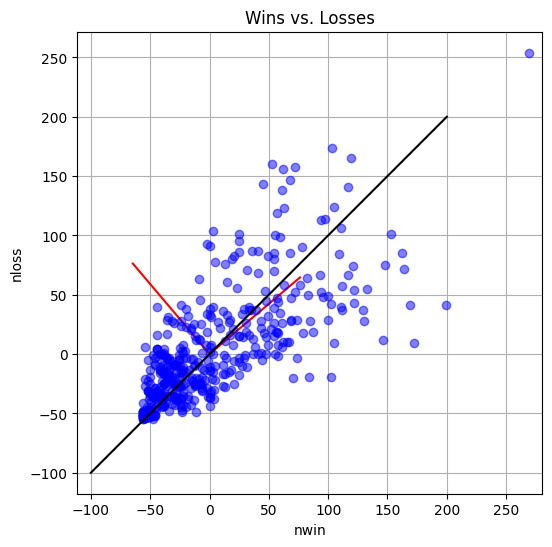

In [127]:
plt.figure(figsize=(6, 6))
plt.title("Wins vs. Losses")
plt.xlabel('nwin')
plt.ylabel('nloss')
plt.plot([0,first_component[0]*100], [0,first_component[1]*100], color='red')
plt.plot([0,second_component[0]*100], [0,second_component[1]*100], color='red')
plt.plot(X[:, 0], X[:, 1], 'o', c='b', alpha=0.5)
plt.plot([-100, 200], [-100, 200], 'k-')
plt.axis('equal')
plt.grid()

In [134]:
def z(win, loss):
    return second_component[0]*(win- np.mean(X[:,0]))+second_component[1]*(loss- np.mean(X[:,1]))

In [146]:
# find the points that have the least z value

z_score = ranked_teams_innovative.copy()

z_score["z"] = z(ranked_teams_innovative["nwin"], ranked_teams_innovative["nloss"])

z_score.sort_values(by="z", ascending=True)[["rank", "name", 'z', "acronym", "team_id", "base_score","ntot", "dominance", "consistency", "region", "international_winp"]].head(20)

,rank,name,z,acronym,team_id,base_score,ntot,dominance,consistency,region,international_winp
147,1,Gen.G,-98.906161,GEN,100205573495116443,84.760532,294,164,0.778912,KOREA,0.702543
426,7,T1,-91.938137,T1,98767991853197861,50.632855,353,159,0.725212,KOREA,0.702543
118,10,DenizBank İstanbul Wildcats,-79.812875,IW,102235771678061291,46.146373,271,135,0.749077,EMEA,0.419435
286,3,PSG Talon,-75.793627,PSG,104367068120825486,72.380878,195,123,0.815385,"HONG KONG, MACAU, TAIWAN",0.253434
430,13,Cloud9,-72.548835,C9,98767991877340524,43.698497,323,129,0.699690,NORTH AMERICA,0.406237
27,4,DetonatioN FocusMe,-64.160046,DFM,100285330168091787,65.927855,177,105,0.796610,JAPAN,0.289655
175,18,Zero Tenacity,-57.262715,Z10,105553606349477427,38.270358,271,103,0.690037,EMEA,0.419435
163,2,The Chiefs,-55.874780,CHF,99566406332987990,73.298682,162,92,0.783951,OCEANIA,0.177632
318,19,G2 Esports,-55.603386,G2,98767991926151025,37.660845,227,97,0.713656,EMEA,0.419435
26,21,Sengoku Gaming,-49.748731,SG,101428372605353526,35.556322,279,93,0.666667,JAPAN,0.289655


# REGIONAL RATINGS (SEPERATE ENDPOINT)

In [90]:
regional_weights = {
    "dominance": 0.5,
    "consistency": 0.5,
    "international_winp": 2.0,
    "teams_in_top_10": 0.1,
    "teams_in_top_50": 0.011
}

regional_rankings = ranked_teams_innovative.groupby("region").agg({
    "rank": "mean",
    "dominance": "mean",
    "consistency": "mean",
    "international_winp": "mean"
}).reset_index()

top_10_regions = ranked_teams_innovative[ranked_teams_innovative["rank"] <= 10]["region"].value_counts()
top_50_regions = ranked_teams_innovative[ranked_teams_innovative["rank"] <= 50]["region"].value_counts()

regional_rankings["teams_in_top_10"] = regional_rankings["region"].map(top_10_regions).fillna(0).astype(int)
regional_rankings["teams_in_top_50"] = regional_rankings["region"].map(top_50_regions).fillna(0).astype(int)

regional_rankings["final_regional_score"] = (
    regional_weights["dominance"] * (1 / regional_rankings["rank"]) +
    regional_weights["consistency"] * regional_rankings["consistency"] +
    regional_weights["international_winp"] * regional_rankings["international_winp"] +
    regional_weights["teams_in_top_10"] * regional_rankings["teams_in_top_10"] +
    regional_weights["teams_in_top_50"] * regional_rankings["teams_in_top_50"]
)

regional_rankings = regional_rankings.sort_values(by="final_regional_score", ascending=False)
regional_rankings.reset_index(drop=True, inplace=True)

regional_rankings[["region", "rank", "dominance", "consistency", "international_winp", "teams_in_top_10", "teams_in_top_50", "final_regional_score"]]


,region,rank,dominance,consistency,international_winp,teams_in_top_10,teams_in_top_50,final_regional_score
0,KOREA,230.785714,-1.428571,0.488794,0.702543,2,5,1.906650
1,CHINA,172.600000,6.500000,0.560138,0.621957,1,2,1.648881
2,EMEA,232.891509,0.250000,0.452389,0.419435,1,16,1.343212
3,NORTH AMERICA,226.069444,1.430556,0.445497,0.406237,0,7,1.114434
4,JAPAN,226.055556,0.944444,0.494545,0.289655,1,2,0.950795
5,BRAZIL,211.615385,0.076923,0.507655,0.310025,0,2,0.898241
6,VIETNAM,194.300000,-2.000000,0.510465,0.248547,1,3,0.887899
7,COMMONWEALTH OF INDEPENDENT STATES,196.555556,0.888889,0.517158,0.288889,0,2,0.860901
8,"HONG KONG, MACAU, TAIWAN",255.500000,-0.363636,0.396788,0.253434,1,4,0.851218
9,OCEANIA,217.818182,-1.090909,0.463117,0.177632,2,2,0.811117


# Visualizations

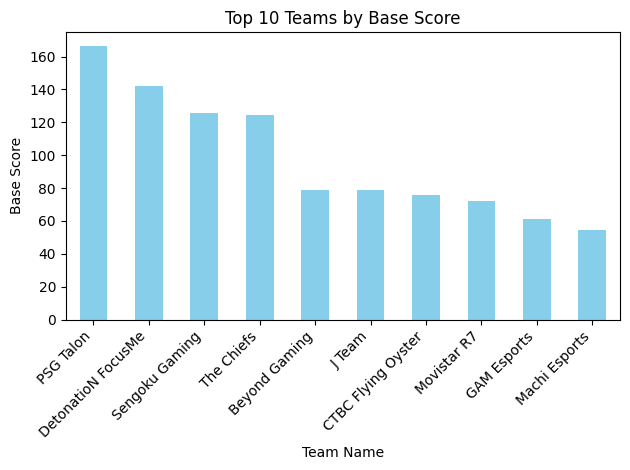

In [19]:
import matplotlib.pyplot as plt

# Select top 10 teams for visualization
top_teams = ranked_teams_innovative.head(10)

# Plotting
top_teams.plot(x='name', y='base_score', kind='bar', legend=False, color='skyblue')
plt.title('Top 10 Teams by Base Score')
plt.ylabel('Base Score')
plt.xlabel('Team Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


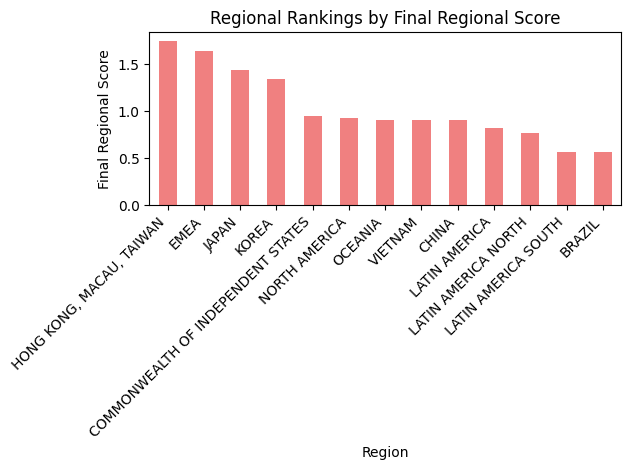

In [20]:
# Plotting
regional_rankings.plot(x='region', y='final_regional_score', kind='bar', legend=False, color='lightcoral')
plt.title('Regional Rankings by Final Regional Score')
plt.ylabel('Final Regional Score')
plt.xlabel('Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
